# 使用Scikit-Learn 完成預測
### Scikit-Learn在三個面向提供支援。
1. 獲取資料:***klearn.datasets***
2. 掌握資料:***sklearn.preprocessing*** 
3. 機器學習:***sklearn Estimator API*** 

獲取資料的方式有很多種（包含檔案、資料庫、網路爬蟲、Kaggle Datasets等），<br>
其中最簡單的方式是從Sklearn import 內建的資料庫。由於其特性隨手可得且不用下載，所以我們通常叫他**玩具資料**：

# 基本架構

* 讀取資料&pre-processing
* 切分訓練集與測試集 
* 模型配適
* 預測 
* 評估(計算成績可能是誤差值或正確率或..)


In [1]:
%matplotlib inline

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 讀取Iris資料集與資料前處理

Iris Flowers 資料集

我們在這個項目中使用 Iris Data Set，這個資料集中的每個樣本有4個特徵，1個類別。該資料集1中的樣本類別數為3類，每類樣本數目為50個，總共150個樣本。

屬性資訊：

    花萼長度 sepal length(cm)
    花萼寬度 sepal width(cm)
    花瓣長度 petal length(cm)
    花瓣寬度 petal width(cm)
    類別：
        Iris Setosa
        Iris Versicolour
        Iris Virginica

樣本特徵資料是數值型的，而且單位都相同（釐米）。

![Iris Flowers](images/iris_data.PNG)


In [2]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

* 印出iris的key值與檔案位置
* 查看前10筆資料
* 查看資料型別
* 印出標註的樣本類別資料

In [7]:
print(iris.keys())
print(iris.data[:10])
print(type(iris.data))
print(iris.feature_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
<class 'numpy.ndarray'>
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [13]:
# we only take the first two features. 
data=iris.data[:,:2]
data.shape

(150, 2)

In [27]:
#以下是組成 pandas DataFrame (也可以不用這種做)
x=pd.DataFrame(iris.data[:,:2],columns=iris.feature_names[:2])
x

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [28]:
print("target_names:"+str(iris.target_names))

target_names:['setosa' 'versicolor' 'virginica']


In [29]:
#建立Target欄位與資料
y=pd.DataFrame(iris.target,columns=['target'])
y.head(10)

,target
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [31]:
#合併資料特徵欄位與目標欄位
iris_data=pd.concat([x,y],axis=1)
iris_data

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [32]:
#只選擇目標為0與1的資料
iris_data=iris_data[iris_data.target.isin([0,1])]
iris_data

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
95,5.7,3.0,1
96,5.7,2.9,1
97,6.2,2.9,1
98,5.1,2.5,1


## 切分訓練集與測試集
> train_test_split()

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(iris_data[['sepal length (cm)','sepal width (cm)']],iris_data['target'],test_size=0.3)

In [35]:
X_train.shape

(70, 2)

In [37]:
X_test.shape

(30, 2)

# Appendix 

>normalization和standardization是差不多的<br>
都是把數據進行前處理，從而使數值都落入到統一的數值範圍，從而在建模過程中，各個特徵量沒差別對待。<br> 
* normalization一般是把數據限定在需要的範圍，比如一般都是【0，1】，從而消除了數據量綱對建模的影響。<br> 
* standardization 一般是指將數據正態化，使平均值0方差為1.<br> 

因此normalization和standardization 是針對數據而言的，消除一些數值差異帶來的特種重要性偏見。<br>
經過歸一化的數據，能加快訓練速度，促進算法的收斂。

### Standardization (z-score)
    to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. 

In [39]:
def norm_stats(dfs):
    minimum = np.min(dfs)
    maximum = np.max(dfs)
    mu = np.mean(dfs)
    sigma = np.std(dfs)
    return (minimum, maximum, mu, sigma)


def z_score(col, stats):
    m, M, mu, s = stats
    df = pd.DataFrame()
    for c in col.columns:
        df[c] = (col[c]-mu[c])/s[c]
    return df

In [41]:
stats = norm_stats(X_train)
arr_x_train = np.array(z_score(X_train, stats))
arr_y_train = np.array(Y_train)
arr_x_train[:5]

C:\Users\SHAO\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\SHAO\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\SHAO\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwarg

array([[ 2.04183495, -0.14127672],
       [-1.10983972,  0.27078038],
       [ 2.19941868, -0.55333382],
       [-0.79467226,  0.06475183],
       [-0.63708852, -0.14127672]])

## use sklearn

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

[5.40428571 3.06857143]
[0.63458326 0.48536963]


In [46]:
#transform: (x-u)/std.
X_train_std = sc.transform(X_train)
X_train_std[:5]

array([[ 2.04183495, -0.14127672],
       [-1.10983972,  0.27078038],
       [ 2.19941868, -0.55333382],
       [-0.79467226,  0.06475183],
       [-0.63708852, -0.14127672]])

The scaler instance can then be used on new data to transform it the same way it did on the training set:

In [48]:
sc=StandardScaler()
X_test_std = sc.fit_transform(X_test)
print(X_test_std[:10])

[[-0.84921693  1.18679852]
 [-0.36548577  0.51502577]
 [ 1.24695145  0.06717727]
 [ 0.76322028 -0.82851972]
 [-0.36548577  1.63464702]
 [-1.3329481  -0.38067122]
 [-1.17170438 -1.72421672]
 [ 0.44073284  0.06717727]
 [-1.01046066  0.29110152]
 [ 0.1182454   2.75426826]]


you can also use fit_transform method (i.e., fit and then transform)    

In [53]:
X_train_std = sc.fit_transform(X_train)
print(type(X_train))
print(type(X_train_std))
print(X_train_std[:10])
X_test_std = sc.fit_transform(X_test)
print(X_test_std[:10])


<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
[[ 2.04183495 -0.14127672]
 [-1.10983972  0.27078038]
 [ 2.19941868 -0.55333382]
 [-0.79467226  0.06475183]
 [-0.63708852 -0.14127672]
 [-1.42500719 -1.58347657]
 [-0.95225599  0.68283748]
 [-0.00675359  1.71298023]
 [-0.63708852  0.68283748]
 [-1.58259093 -0.34730527]]
[[-0.84921693  1.18679852]
 [-0.36548577  0.51502577]
 [ 1.24695145  0.06717727]
 [ 0.76322028 -0.82851972]
 [-0.36548577  1.63464702]
 [-1.3329481  -0.38067122]
 [-1.17170438 -1.72421672]
 [ 0.44073284  0.06717727]
 [-1.01046066  0.29110152]
 [ 0.1182454   2.75426826]]


In [32]:
print('mean of X_train_std:',np.round(X_train_std.mean(),4))
print('std of X_train_std:',X_train_std.std())

mean of X_train_std: -0.0
std of X_train_std: 1.0


## Min-Max Normaliaztion
    Transforms features by scaling each feature to a given range.
    The transformation is given by:

    X' = X - X.min(axis=0) / ((X.max(axis=0) - X.min(axis=0))
    X -> N 維資料
    


50.167759845009215
30.213077799682438


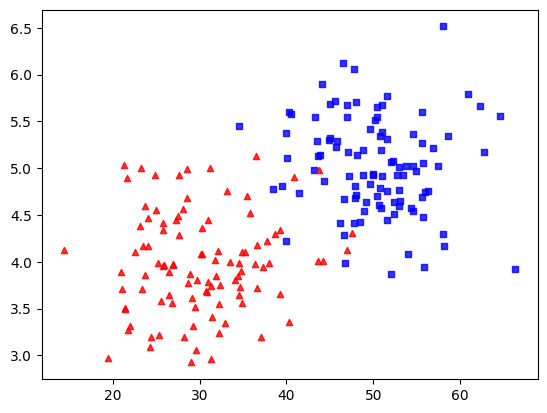

In [54]:
x1 = np.random.normal(50, 6, 100)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5, 100)

x2 = np.random.normal(30,6,100)
y2 = np.random.normal(4,0.5,100)
plt.scatter(x1,y1,c='b',marker='s',s=20,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=20, alpha=0.8)

print(np.sum(x1)/len(x1))
print(np.sum(x2)/len(x2))

In [55]:
x_val = np.concatenate((x1,x2))
y_val = np.concatenate((y1,y2))

x_val.shape

(200,)

In [56]:
def minmax_norm(X):
    return (X - X.min(axis=0)) / ((X.max(axis=0) - X.min(axis=0)))

In [57]:
minmax_norm(x_val[:10])

array([1.        , 0.63016432, 0.6647353 , 0.56779097, 0.        ,
       0.89671014, 0.21436146, 0.1046858 , 0.97930327, 0.73063141])

In [58]:
from sklearn.preprocessing import MinMaxScaler
x_val=x_val.reshape(-1, 1)
scaler = MinMaxScaler().fit(x_val)  # default range 0~1
print(scaler.data_max_)
print(scaler.transform(x_val)[:10])

[66.32036024]
[[0.77448821]
 [0.69280637]
 [0.70044171]
 [0.67903061]
 [0.5536284 ]
 [0.75167564]
 [0.60097223]
 [0.57674929]
 [0.76991714]
 [0.71499552]]
